### aim: check that all data 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

## for hist scen (1B)

In [4]:
ex = False
if ex:
    w = xr.open_dataset('/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen1A_wind_y1992m02.nc')

    tvd = w.vwind10m.resample(time_counter='1D').mean()
    tud = w.uwind10m.resample(time_counter='1D').mean()

    ms = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

    for i in range(1940,2024):
        for m in range(0,12):

            print(f'{i} ----- {ms[m]}')

            w = xr.open_dataset(f'/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen1B_wind_y{i}m{ms[m]}.nc')
            tvd = w.vwind10m.resample(time_counter='1D').mean()
            tud = w.uwind10m.resample(time_counter='1D').mean()
            tvd.to_netcdf(f'/gpfs/data/greenocean2/software/products/windsFromComponents/symlinked_hrly_UKESM/newdaily/scen1B_vwnd_y{i}m{ms[m]}.nc')
            tud.to_netcdf(f'/gpfs/data/greenocean2/software/products/windsFromComponents/symlinked_hrly_UKESM/newdaily/scen1B_uwnd_y{i}m{ms[m]}.nc')


# for no-ozone scen (2B)

In [5]:
ex = True
if ex:
    w = xr.open_dataset('/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen1A_wind_y1992m02.nc')

    tvd = w.vwind10m.resample(time_counter='1D').mean()
    tud = w.uwind10m.resample(time_counter='1D').mean()

    ms = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

    for i in range(1940,2024):
        for m in range(0,12):

            print(f'{i} ----- {ms[m]}')

            w = xr.open_dataset(f'/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/scen2B_wind_y{i}m{ms[m]}.nc')
            tvd = w.vwind10m.resample(time_counter='1D').mean()
            tud = w.uwind10m.resample(time_counter='1D').mean()
            tvd.to_netcdf(f'/gpfs/data/greenocean2/software/products/windsFromComponents/symlinked_hrly_UKESM/newdaily/scen2B_vwnd_y{i}m{ms[m]}.nc')
            tud.to_netcdf(f'/gpfs/data/greenocean2/software/products/windsFromComponents/symlinked_hrly_UKESM/newdaily/scen2B_uwnd_y{i}m{ms[m]}.nc')


1940 ----- 01
1940 ----- 02
1940 ----- 03
1940 ----- 04
1940 ----- 05
1940 ----- 06
1940 ----- 07
1940 ----- 08
1940 ----- 09
1940 ----- 10
1940 ----- 11
1940 ----- 12
1941 ----- 01
1941 ----- 02
1941 ----- 03
1941 ----- 04
1941 ----- 05
1941 ----- 06
1941 ----- 07
1941 ----- 08
1941 ----- 09
1941 ----- 10
1941 ----- 11
1941 ----- 12
1942 ----- 01
1942 ----- 02
1942 ----- 03
1942 ----- 04
1942 ----- 05
1942 ----- 06
1942 ----- 07
1942 ----- 08
1942 ----- 09
1942 ----- 10
1942 ----- 11
1942 ----- 12
1943 ----- 01
1943 ----- 02
1943 ----- 03
1943 ----- 04
1943 ----- 05
1943 ----- 06
1943 ----- 07
1943 ----- 08
1943 ----- 09
1943 ----- 10
1943 ----- 11
1943 ----- 12
1944 ----- 01
1944 ----- 02
1944 ----- 03
1944 ----- 04
1944 ----- 05
1944 ----- 06
1944 ----- 07
1944 ----- 08
1944 ----- 09
1944 ----- 10
1944 ----- 11
1944 ----- 12
1945 ----- 01
1945 ----- 02
1945 ----- 03
1945 ----- 04
1945 ----- 05
1945 ----- 06
1945 ----- 07
1945 ----- 08
1945 ----- 09
1945 ----- 10
1945 ----- 11
1945 -

In [ ]:
td = '/gpfs/data/greenocean2/software/products/windsFromComponents/'

ncep_doe = 'NCEP-DOE/'
ncep_ncar = 'NCEP-NCAR/'
era5 = 'ERA5_v2024/'

## NCEP_DOE

In [17]:
ms = [f'{i:02}' for i in range(1, 13)]

print(ms)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']


In [16]:
tvd

<xarray.DataArray 'vwind10m' (time_counter: 30, latitude_1: 145, longitude_1: 192)>
array([[[-2.6699219 , -2.5566406 , -2.4707031 , ..., -2.9453125 ,
         -2.859375  , -2.78125   ],
        [-1.3134766 , -1.3574219 , -1.4345703 , ..., -1.1884766 ,
         -1.2353516 , -1.2871094 ],
        [-1.1298828 , -1.2324219 , -1.3388672 , ..., -0.78515625,
         -0.9042969 , -1.0175781 ],
        ...,
        [-0.17871094, -0.18652344, -0.17871094, ..., -0.09667969,
         -0.13085938, -0.16015625],
        [ 1.9736328 ,  1.9570312 ,  1.9394531 , ...,  2.0078125 ,
          2.0009766 ,  1.9902344 ],
        [ 3.3515625 ,  3.305664  ,  3.2548828 , ...,  3.4658203 ,
          3.4316406 ,  3.3935547 ]],

       [[-1.6298828 , -1.5830078 , -1.6005859 , ..., -1.6894531 ,
         -1.6542969 , -1.6503906 ],
        [-1.6083984 , -1.7109375 , -1.8212891 , ..., -1.3310547 ,
         -1.4208984 , -1.5097656 ],
        [-1.0351562 , -1.2109375 , -1.3837891 , ..., -0.50878906,
         -0.6875    , -0.8613281 ],
...
        [ 3.9140625 ,  3.8085938 ,  3.725586  , ...,  4.251953  ,
          4.116211  ,  4.0234375 ],
        [ 4.8916016 ,  4.7851562 ,  4.6757812 , ...,  5.2402344 ,
          5.1240234 ,  5.0009766 ],
        [ 5.1484375 ,  5.0527344 ,  4.9746094 , ...,  5.383789  ,
          5.3046875 ,  5.234375  ]],

       [[-2.8798828 , -3.0439453 , -3.2001953 , ..., -2.3916016 ,
         -2.5576172 , -2.7226562 ],
        [-3.290039  , -3.522461  , -3.7421875 , ..., -2.5097656 ,
         -2.7695312 , -3.0292969 ],
        [-4.666992  , -4.9453125 , -5.180664  , ..., -3.899414  ,
         -4.1464844 , -4.4033203 ],
        ...,
        [-0.11132812, -0.27539062, -0.40722656, ...,  0.375     ,
          0.20605469,  0.046875  ],
        [ 1.1171875 ,  0.9814453 ,  0.8642578 , ...,  1.5126953 ,
          1.3867188 ,  1.2558594 ],
        [-0.19140625, -0.18457031, -0.18847656, ..., -0.20507812,
         -0.16796875, -0.18847656]]], dtype=float32)
Coordinates:
  * time_counter  (time_counter) object 1992-02-01 00:00:00 ... 1992-02-30 00...
  * longitude_1   (longitude_1) float32 0.9375 2.812 4.688 ... 355.3 357.2 359.1
  * latitude_1    (latitude_1) float32 -90.0 -88.75 -87.5 ... 87.5 88.75 90.0

In [7]:
# w = xr.open_dataset(f'{td}/{ncep_doe}/data_vwnd.nc')
# plt.figure()
# plt.plot(w.time,w.vwnd[:,0,10,10])
# w = xr.open_dataset(f'{td}/{ncep_doe}/data_uwnd.nc')
# plt.plot(w.time,w.uwnd[:,0,10,10])

## NCEP_NCAR

In [8]:
# for y in range (1948,2023):
    
#     v = glob.glob(f'/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-NCAR/windV/*{y}*')
#     print(v)

## ERA

In [9]:

# for y in range (1940,2023):
    
#     v = glob.glob(f'/gpfs/data/greenocean2/software/products/windsFromComponents/ERA5_v2024/scripts/10m_u*{y}*')
#     print(v)
#     v = glob.glob(f'/gpfs/data/greenocean2/software/products/windsFromComponents/ERA5_v2024/scripts/10m_v*{y}*')
#     print(v)
#     print('-')

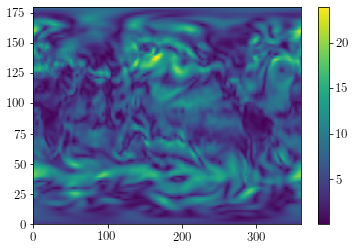

In [10]:
w = xr.open_dataset('/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-DOE/data_windspeed_rg.nc')

q = plt.pcolormesh(w.windspeed[10,0,:,:])
plt.colorbar(q)